In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Loading data and importing libraries**

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [3]:
df = pd.read_csv('/content/drive/MyDrive/train.csv')

**Candlestick charts**

<ipython-input-9-7312b22fbafc>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([date.strftime('%Y-%m') for date in df_asset_1.resample('3M', on='timestamp').mean().index])


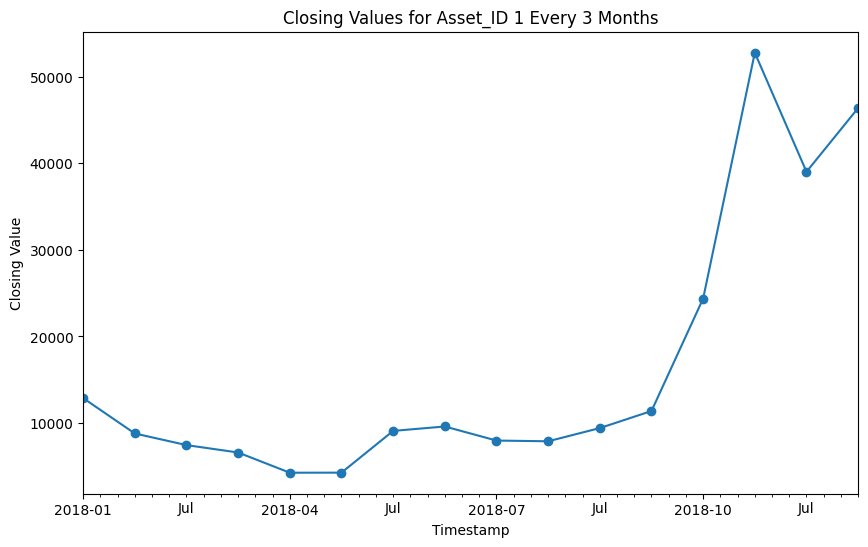

In [9]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')  # Assuming 'timestamp' is the column with Unix timestamps

# Step 2: Filter for asset_id = 1
df_asset_1 = df[df['Asset_ID'] == 1]

# Step 3: Plot closing values for every 3 months
plt.figure(figsize=(10, 6))
ax = df_asset_1.resample('3M', on='timestamp')['Close'].mean().plot(marker='o', linestyle='-')

# Format x-axis labels to show only the year and month
ax.set_xticklabels([date.strftime('%Y-%m') for date in df_asset_1.resample('3M', on='timestamp').mean().index])
plt.title('Closing Values for Asset_ID 1 Every 3 Months')
plt.xlabel('Timestamp')
plt.ylabel('Closing Value')
plt.show()

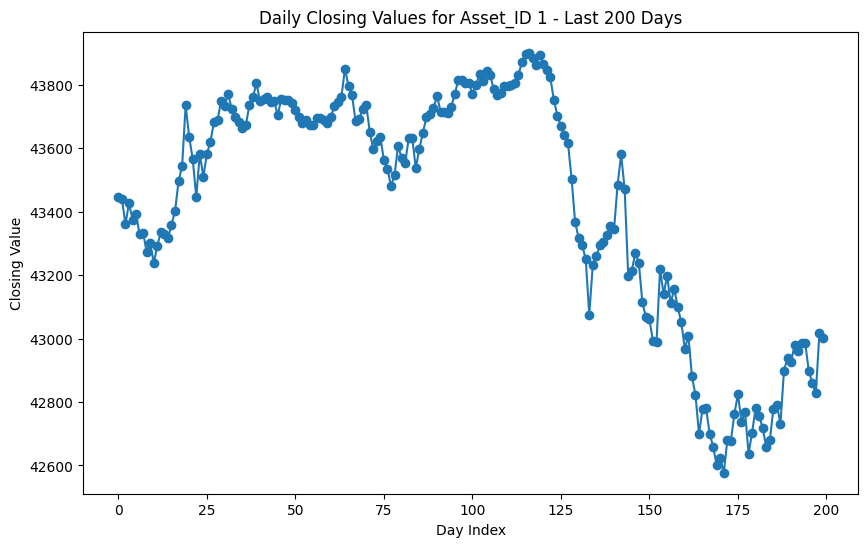

In [10]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')  # Assuming 'timestamp' is the column with Unix timestamps

# Step 2: Filter for asset_id = 1
df_asset_1 = df[df['Asset_ID'] == 1]

# Step 3: Specify the number of days to monitor
num_days_to_monitor = 200  # Change this value to the desired number of days

# Step 4: Extract the last N rows and plot closing values
plt.figure(figsize=(10, 6))
df_tail = df_asset_1.tail(num_days_to_monitor)
plt.plot(range(num_days_to_monitor), df_tail['Close'], marker='o', linestyle='-')

plt.title(f'Daily Closing Values for Asset_ID 1 - Last {num_days_to_monitor} Days')
plt.xlabel('Day Index')
plt.ylabel('Closing Value')
plt.show()

**Co-relation between bitcoin and other available** **assets**

In [11]:
# Filter data for Asset ID 1
asset_id_1_data = df[df["Asset_ID"] == 1].set_index("timestamp")


asset_id_1_data = asset_id_1_data.loc['1-1-2018':'21-9-2021']

# Initialize a DataFrame to store correlations
correlations_df = pd.DataFrame(columns=['Asset_ID', 'Correlation'])

for asset_id in df['Asset_ID'].unique():
    if asset_id == 1:
        continue  # Skip calculating correlation with itself

    # Filter data for the current asset
    current_asset_data = df[df["Asset_ID"] == asset_id].set_index("timestamp")

    # Merge data on timestamps
    merged_data = pd.merge(asset_id_1_data, current_asset_data, left_index=True, right_index=True, how='inner')

    # Calculate correlation
    correlation = merged_data['Close_x'].corr(merged_data['Close_y'])

    # Append to the correlations DataFrame
    correlations_df = correlations_df.append({'Asset_ID': asset_id, 'Correlation': correlation}, ignore_index=True)

# Display the correlations
print(correlations_df)

<ipython-input-11-17948b1887bb>:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  asset_id_1_data = asset_id_1_data.loc['1-1-2018':'21-9-2021']
<ipython-input-11-17948b1887bb>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlations_df = correlations_df.append({'Asset_ID': asset_id, 'Correlation': correlation}, ignore_index=True)
<ipython-input-11-17948b1887bb>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlations_df = correlations_df.append({'Asset_ID': asset_id, 'Correlation': correlation}, ignore_index=True)
<ipython-input-11-17948b1887bb>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use

    Asset_ID  Correlation
0        2.0     0.222375
1        0.0     0.885380
2        5.0     0.032793
3        7.0     0.627133
4        6.0     0.895574
5        9.0     0.758839
6       11.0     0.722749
7       13.0     0.782703
8       12.0     0.798129
9        3.0     0.856364
10       8.0     0.699021
11      10.0     0.825513
12       4.0     0.700678


<ipython-input-11-17948b1887bb>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlations_df = correlations_df.append({'Asset_ID': asset_id, 'Correlation': correlation}, ignore_index=True)


**Candlestick charts**

<ipython-input-12-4bc4fd4e4400>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([date.strftime('%Y-%m') for date in df_asset_1.resample('3M', on='timestamp').mean().index])


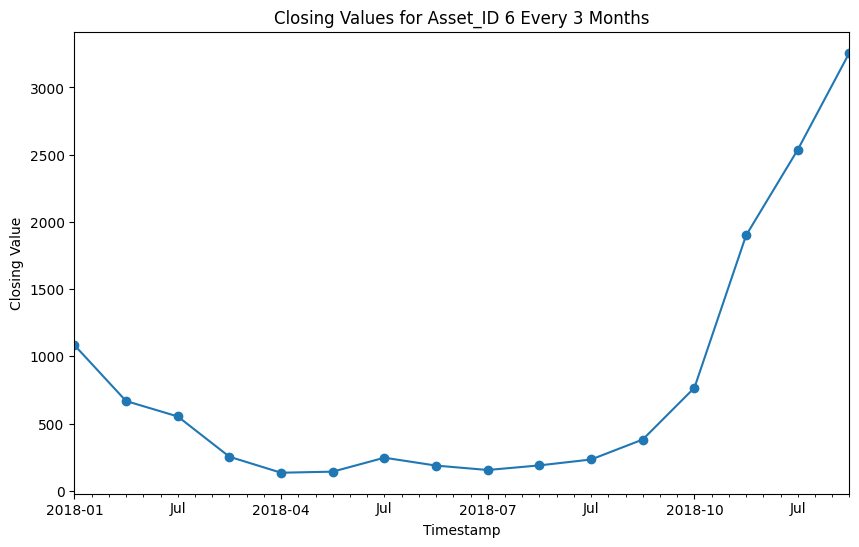

In [12]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')  # Assuming 'timestamp' is the column with Unix timestamps

# Step 2: Filter for asset_id = 1
df_asset_1 = df[df['Asset_ID'] == 6]

# Step 3: Plot closing values for every 3 months
plt.figure(figsize=(10, 6))
ax = df_asset_1.resample('3M', on='timestamp')['Close'].mean().plot(marker='o', linestyle='-')

# Format x-axis labels to show only the year and month
ax.set_xticklabels([date.strftime('%Y-%m') for date in df_asset_1.resample('3M', on='timestamp').mean().index])
plt.title('Closing Values for Asset_ID 6 Every 3 Months')
plt.xlabel('Timestamp')
plt.ylabel('Closing Value')
plt.show()

<ipython-input-13-272f0621f406>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([date.strftime('%Y-%m') for date in df_asset_1.resample('3M', on='timestamp').mean().index])


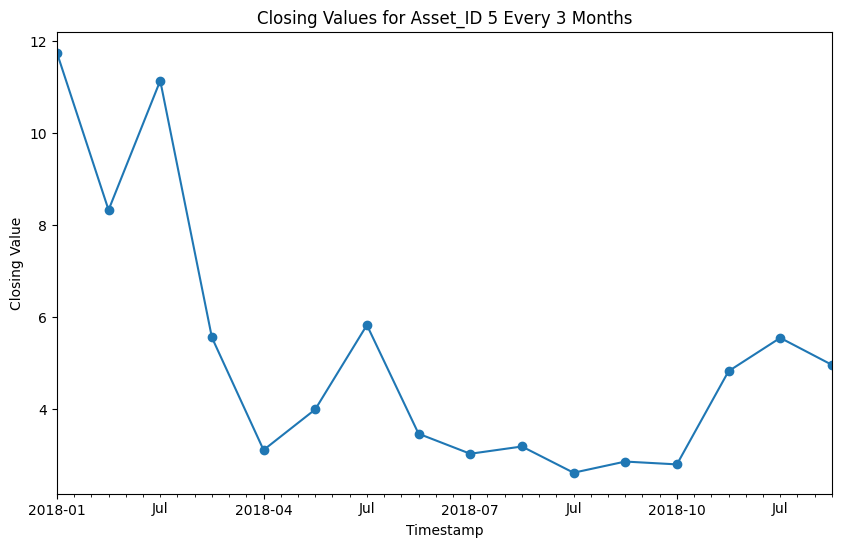

In [13]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')  # Assuming 'timestamp' is the column with Unix timestamps

# Step 2: Filter for asset_id = 1
df_asset_1 = df[df['Asset_ID'] == 5]

# Step 3: Plot closing values for every 3 months
plt.figure(figsize=(10, 6))
ax = df_asset_1.resample('3M', on='timestamp')['Close'].mean().plot(marker='o', linestyle='-')

# Format x-axis labels to show only the year and month
ax.set_xticklabels([date.strftime('%Y-%m') for date in df_asset_1.resample('3M', on='timestamp').mean().index])
plt.title('Closing Values for Asset_ID 5 Every 3 Months')
plt.xlabel('Timestamp')
plt.ylabel('Closing Value')
plt.show()

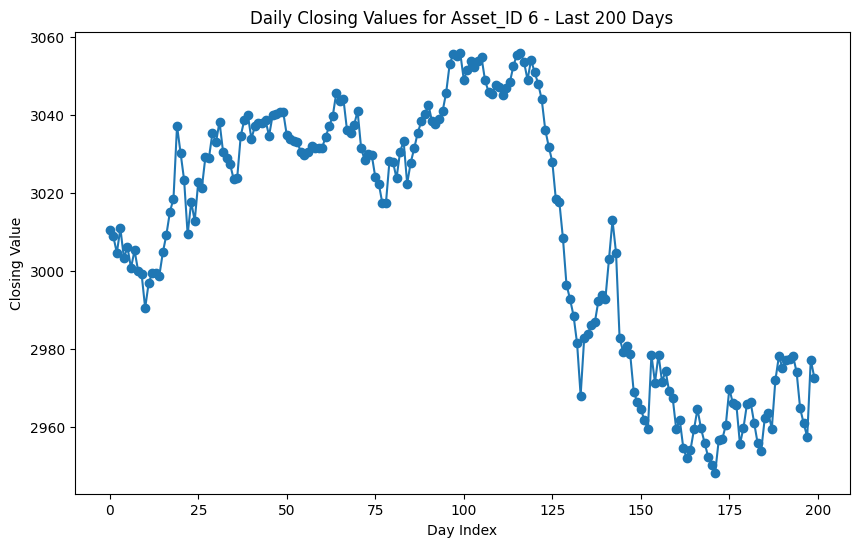

In [14]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')  # Assuming 'timestamp' is the column with Unix timestamps

# Step 2: Filter for asset_id = 1
df_asset_1 = df[df['Asset_ID'] == 6]

# Step 3: Specify the number of days to monitor
num_days_to_monitor = 200  # Change this value to the desired number of days

# Step 4: Extract the last N rows and plot closing values
plt.figure(figsize=(10, 6))
df_tail = df_asset_1.tail(num_days_to_monitor)
plt.plot(range(num_days_to_monitor), df_tail['Close'], marker='o', linestyle='-')

plt.title(f'Daily Closing Values for Asset_ID 6 - Last {num_days_to_monitor} Days')
plt.xlabel('Day Index')
plt.ylabel('Closing Value')
plt.show()

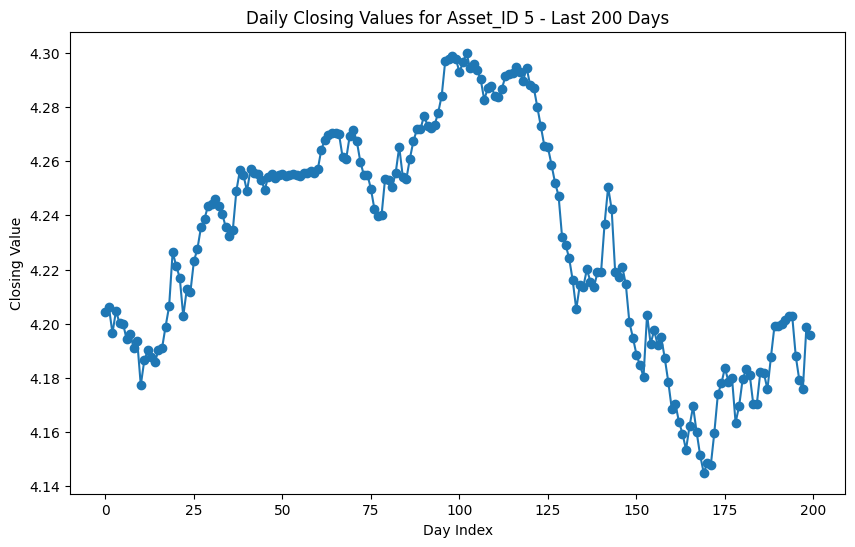

In [15]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')  # Assuming 'timestamp' is the column with Unix timestamps

# Step 2: Filter for asset_id = 1
df_asset_1 = df[df['Asset_ID'] == 5]

# Step 3: Specify the number of days to monitor
num_days_to_monitor = 200  # Change this value to the desired number of days

# Step 4: Extract the last N rows and plot closing values
plt.figure(figsize=(10, 6))
df_tail = df_asset_1.tail(num_days_to_monitor)
plt.plot(range(num_days_to_monitor), df_tail['Close'], marker='o', linestyle='-')

plt.title(f'Daily Closing Values for Asset_ID 5 - Last {num_days_to_monitor} Days')
plt.xlabel('Day Index')
plt.ylabel('Closing Value')
plt.show()

**Creating required dataframes**

In [31]:
df[df["Asset_ID"]==1].count()

timestamp    1956282
Asset_ID     1956282
Count        1956282
Open         1956282
High         1956282
Low          1956282
Close        1956282
Volume       1956282
VWAP         1956282
Target       1955978
dtype: int64

In [32]:
btc = df[df["Asset_ID"]==1].set_index("timestamp")
eth = df[df["Asset_ID"]==6].set_index("timestamp")
eos = df[df["Asset_ID"]==5].set_index("timestamp")
(btc.index[1:]-btc.index[:-1]).value_counts().head()
(eth.index[1:]-eth.index[:-1]).value_counts().head()
(eos.index[1:]-eos.index[:-1]).value_counts().head()

0 days 00:01:00    1953951
0 days 00:02:00       1005
0 days 00:03:00        108
0 days 00:04:00         36
0 days 00:05:00         10
Name: timestamp, dtype: int64

In [33]:
btc['Close'].count()

1956282

**Seasonal Decomposition**

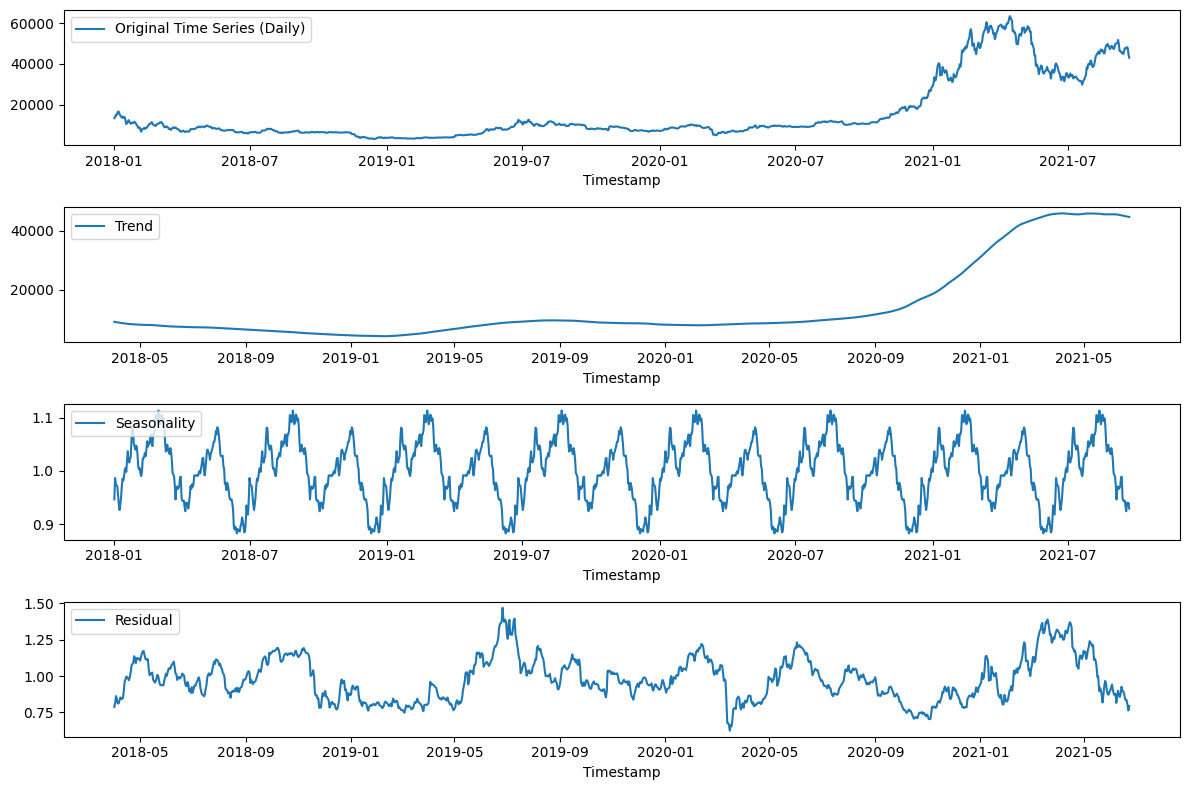

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Assuming 'eth' is your DataFrame with 'timestamp' as the index
# Convert timestamp to datetime if it's not already
btc.index = pd.to_datetime(btc.index, unit='s')

# Assuming 'Close' is the column you want to decompose
btc_close = btc['Close']

# Resample the data to daily frequency
btc_close_daily = btc_close.resample('D').mean()

# Perform multiplicative decomposition with a period of 360 (6 hours)
result = seasonal_decompose(btc_close_daily, model='multiplicative', period=180)

# Extract decomposed components
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Plot the original time series and decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(btc_close_daily, label='Original Time Series (Daily)')
plt.legend(loc='upper left')
plt.xlabel('Timestamp')

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.xlabel('Timestamp')

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.xlabel('Timestamp')

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual')
plt.legend(loc='upper left')
plt.xlabel('Timestamp')

plt.tight_layout()
plt.show()

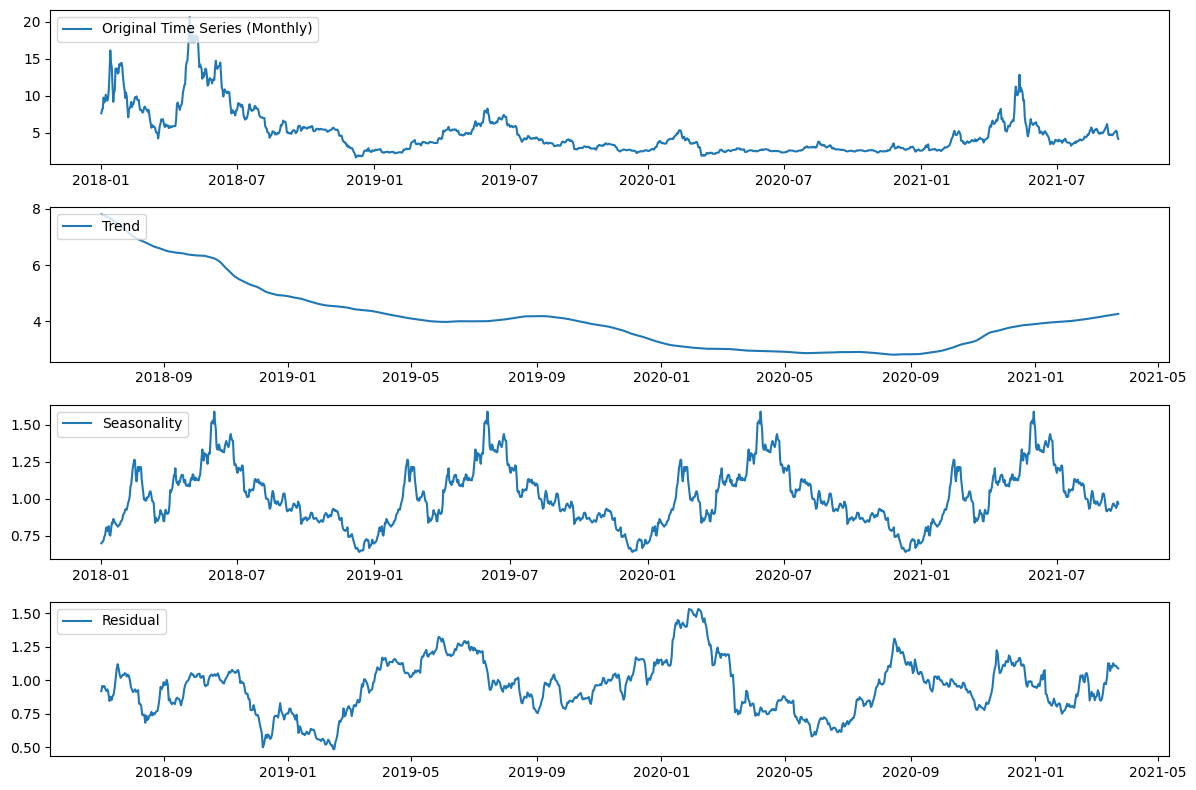

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Convert timestamp to datetime if it's not already
eos.index = pd.to_datetime(eos.index, unit='s')

# Assuming 'Close' is the column you want to decompose
eos_close = eos['Close']

# Resample the data to monthly frequency
eos_close_monthly = eos_close.resample('D').mean()

# Perform multiplicative decomposition
result = seasonal_decompose(eos_close_monthly, model='multiplicative', period=365)  # Monthly frequency, adjust as needed

# Extract decomposed components
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Plot the original time series and decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(eos_close_monthly, label='Original Time Series (Monthly)')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


**Handling nulls and missing records in time series**

In [36]:
moving_avg_btc = btc['Target'].rolling(window=1000, min_periods=1).mean()
# Fill NaN values in the specified column with moving average
btc['Target'] = btc['Target'].fillna(moving_avg_btc)
moving_avg_eth = eth['Target'].rolling(window=1000, min_periods=1).mean()
# Fill NaN values in the specified column with moving average
eth['Target'] = eth['Target'].fillna(moving_avg_eth)

moving_avg_eos = eos['Target'].rolling(window=1000, min_periods=1).mean()
# Fill NaN values in the specified column with moving average
eos['Target'] = eos['Target'].fillna(moving_avg_eth)

**Converting timeframe into datetime format**

In [45]:
# Preprocessing
btc.reset_index(drop=False, inplace=True)
btc['timestamp'] = pd.to_datetime(btc['timestamp'], unit='s')
btc.set_index('timestamp', inplace=True)
eth.reset_index(drop=False, inplace=True)
eth['timestamp'] = pd.to_datetime(eth['timestamp'], unit='s')
eth.set_index('timestamp', inplace=True)
eos.reset_index(drop=False, inplace=True)
eos['timestamp'] = pd.to_datetime(eos['timestamp'], unit='s')
eos.set_index('timestamp', inplace=True)

**Chopping data to include 2 months of data from july 10 to sep 20**

In [46]:
btc = btc[btc.index > '2021-07-10']
eth = eth[eth.index > '2021-07-10']
eos = eos[eos.index > '2021-07-10']

In [47]:
# Define a mapping of suffixes for each asset
suffix_mapping = {
    'btc': '_btc',
    'eth': '_eth',
    'eos': '-eos'# Assuming there was a typo and you meant 'car' instead of 'bcc' for the fifth DataFrame
}

# Apply unique suffixes to column names and drop 'asset_id'
for asset, suffix in suffix_mapping.items():
    # Rename columns
    globals()[asset] = globals()[asset].rename(columns={
        'Count': 'Count' + suffix,
        'Open': 'Open' + suffix,
        'High': 'High' + suffix,
        'Low': 'Low' + suffix,
        'Close': 'Close' + suffix,
        'Target': 'Target' + suffix,
        'Volume': 'Volume' + suffix,
        'VWAP': 'VWAP' + suffix,
        'Asset_ID': 'Asset_ID'+suffix
    })

    # Drop 'asset_id'
    globals()[asset] = globals()[asset].drop('asset_id', axis=1, errors='ignore')

**Merging different dataframes to form our input**

In [48]:
df = pd.concat([btc,eth,eos],axis=1)

In [49]:
df

,Asset_ID_btc,Count_btc,Open_btc,High_btc,Low_btc,Close_btc,Volume_btc,VWAP_btc,Target_btc,Asset_ID_eth,...,Target_eth,Asset_ID-eos,Count-eos,Open-eos,High-eos,Low-eos,Close-eos,Volume-eos,VWAP-eos,Target-eos
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-07-10 00:01:00,1,2035.0,33759.411429,33823.300000,33724.000000,33798.285714,79.115265,33784.442186,-0.001898,6,...,-0.002901,5,1482.0,4.232544,4.2500,4.228165,4.243683,209351.910417,4.241450,0.018492
2021-07-10 00:02:00,1,2266.0,33800.170000,33864.700000,33752.000000,33833.870000,115.464237,33832.842534,-0.002214,6,...,-0.003325,5,3212.0,4.244017,4.2810,4.239600,4.270350,380086.581977,4.268929,0.026362
2021-07-10 00:03:00,1,1560.0,33830.863777,33872.860000,33789.896439,33857.848453,76.921064,33839.745858,-0.002139,6,...,-0.002554,5,1758.0,4.270600,4.2831,4.248200,4.254100,210406.456638,4.268373,0.020803
2021-07-10 00:04:00,1,1460.0,33858.695000,33885.720000,33799.000000,33858.577500,50.497681,33858.692109,-0.001378,6,...,-0.002199,5,1247.0,4.251283,4.2640,4.235522,4.259200,95175.393134,4.250141,0.019065
2021-07-10 00:05:00,1,1058.0,33856.696667,33889.870000,33804.000000,33872.166667,33.871756,33863.176976,-0.001744,6,...,-0.002790,5,323.0,4.259300,4.2660,4.252598,4.261383,56542.831970,4.261006,0.022705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-20 23:56:00,1,1940.0,42983.780000,43001.850849,42878.260000,42899.012857,56.850913,42935.489499,-0.000235,6,...,-0.000088,5,276.0,4.202917,4.2060,4.185600,4.188017,27811.498394,4.198326,-0.000088
2021-09-20 23:57:00,1,2026.0,42904.197143,42932.000000,42840.160000,42860.005714,80.993326,42879.576084,-0.000234,6,...,-0.000087,5,236.0,4.189517,4.1910,4.177100,4.179167,27641.893811,4.185219,-0.000087
2021-09-20 23:58:00,1,1986.0,42859.385714,42887.500000,42797.200000,42827.020000,65.677734,42844.090693,-0.000228,6,...,-0.000088,5,236.0,4.178533,4.1830,4.171700,4.175733,18268.802763,4.176891,-0.000088


**Splitting data into test, validation and train splits**

In [94]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.6)]

val_df = df[int(n*0.6):int(n*0.8)]
test_df = df[int(n*0.8):]

num_features = df.shape[1]

**Performing local standardisation (standardising as per rolling window fed into LSTM Model and adding different time variables to capture temporal variations**

In [95]:
import pandas as pd

def standardize_data(df, columns_to_exclude=None, window_size=120):
    if columns_to_exclude is None:
        columns_to_exclude = []

    standardized_df = df.copy()
    for col in df.columns:
        if col not in columns_to_exclude:
            moving_avg = df[col].rolling(window=window_size, min_periods=1).mean()
            moving_std = df[col].rolling(window=window_size, min_periods=1).std()
            standardized_df[col] = (df[col] - moving_avg) / moving_std
    return standardized_df

# Example usage
# Assuming train_df, test_df, val_df are your DataFrames
# Exclude certain columns from standardization
columns_to_exclude = ['Asset_ID_btc','Asset_ID_eth', 'Asset_ID-eos']

# Standardize train_df
train_df = standardize_data(train_df, columns_to_exclude=columns_to_exclude)
train_df['day'] = train_df.index.day
train_df['hour'] = train_df.index.hour
train_df['week'] = train_df.index.week
train_df['month'] = train_df.index.month
train_df.dropna(inplace=True)

# Use the same moving averages and standard deviations from train_df to standardize test_df and val_df
val_df = standardize_data(val_df, columns_to_exclude=columns_to_exclude)
val_df['day'] = val_df.index.day
val_df['hour'] = val_df.index.hour
val_df['week'] = val_df.index.week
val_df['month'] = val_df.index.month


test_df = standardize_data(test_df, columns_to_exclude=columns_to_exclude)
test_df['day'] = test_df.index.day
test_df['hour'] = test_df.index.hour
test_df['week'] = test_df.index.week
test_df['month'] = test_df.index.month


<ipython-input-95-f1caff650afd>:24: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  train_df['week'] = train_df.index.week
<ipython-input-95-f1caff650afd>:32: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  val_df['week'] = val_df.index.week
<ipython-input-95-f1caff650afd>:39: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  test_df['week'] = test_

In [96]:

train_df.isnull().sum()

Asset_ID_btc    0
Count_btc       0
Open_btc        0
High_btc        0
Low_btc         0
Close_btc       0
Volume_btc      0
VWAP_btc        0
Target_btc      0
Asset_ID_eth    0
Count_eth       0
Open_eth        0
High_eth        0
Low_eth         0
Close_eth       0
Volume_eth      0
VWAP_eth        0
Target_eth      0
Asset_ID-eos    0
Count-eos       0
Open-eos        0
High-eos        0
Low-eos         0
Close-eos       0
Volume-eos      0
VWAP-eos        0
Target-eos      0
day             0
hour            0
week            0
month           0
dtype: int64

In [97]:
train_df= train_df[2:]
train_df
val_df.dropna(inplace = True)
val_df.isnull().sum()
val_df= val_df[2:]
test_df= test_df[2:]

In [98]:
test_df.isnull().sum()

Asset_ID_btc    0
Count_btc       0
Open_btc        0
High_btc        0
Low_btc         0
Close_btc       0
Volume_btc      0
VWAP_btc        0
Target_btc      0
Asset_ID_eth    0
Count_eth       0
Open_eth        0
High_eth        0
Low_eth         0
Close_eth       0
Volume_eth      0
VWAP_eth        0
Target_eth      0
Asset_ID-eos    0
Count-eos       0
Open-eos        0
High-eos        0
Low-eos         0
Close-eos       0
Volume-eos      0
VWAP-eos        0
Target-eos      0
day             0
hour            0
week            0
month           0
dtype: int64

**Input feeding functions into LSTM**

In [99]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [100]:
w2 = WindowGenerator(input_width=10, label_width=1, shift=1,
                     label_columns=['Target_btc','Target_eth','Target-eos'])
w2

Total window size: 11
Input indices: [0 1 2 3 4 5 6 7 8 9]
Label indices: [10]
Label column name(s): ['Target_btc', 'Target_eth', 'Target-eos']

In [101]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [102]:

# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')

print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 11, 31)
Inputs shape: (3, 10, 31)
Labels shape: (3, 1, 3)


In [103]:
w2.example = example_inputs, example_labels

In [104]:
def plot(self, model=None, plot_col='Target_btc', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Target')

WindowGenerator.plot = plot

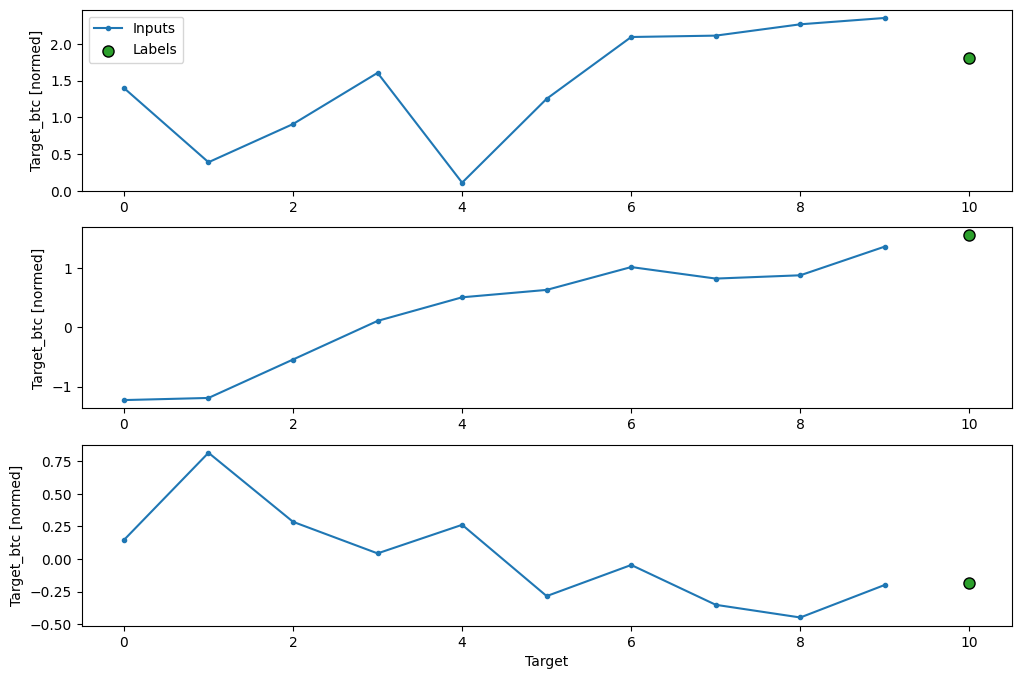

In [105]:
w2.plot()

In [106]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=128,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [107]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

**Inputting the rolling window of input**

In [108]:
wide_window = WindowGenerator(
    input_width=120, label_width=120, shift=1,
    label_columns=['Target_btc','Target_eth', 'Target-eos'])

wide_window

Total window size: 121
Input indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]
Label indices: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 

**LSTM Model**

In [109]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [110]:
import tensorflow as tf

# Define the model
lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.Dropout(0.2),  # Dropout layer with a dropout rate of 0.2
    #tf.keras.layers.LSTM(128, return_sequences=True),
    #tf.keras.layers.Dropout(0.2),  # Dropout layer with a dropout rate of 0.2
    #tf.keras.layers.LSTM(64, return_sequences=False),  # No need for return_sequences=True for the last LSTM layer
    #tf.keras.layers.Dropout(0.2),  # Dropout layer with a dropout rate of 0.2
    tf.keras.layers.Dense(units=3)
])


In [111]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)
val_performance = {}
performance = {}

Input shape: (128, 120, 31)
Output shape: (128, 120, 3)


**Fitting the data and evaluting its performance on test data**

In [112]:
history = compile_and_fit(lstm_model, wide_window)

#IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

Epoch 1/20
492/492 [==============================] - 125s 251ms/step - loss: 0.4022 - mean_absolute_error: 0.4614 - val_loss: 0.2162 - val_mean_absolute_error: 0.3370
Epoch 2/20
492/492 [==============================] - 117s 237ms/step - loss: 0.2931 - mean_absolute_error: 0.4005 - val_loss: 0.2108 - val_mean_absolute_error: 0.3330
Epoch 3/20
492/492 [==============================] - 117s 238ms/step - loss: 0.2779 - mean_absolute_error: 0.3907 - val_loss: 0.2075 - val_mean_absolute_error: 0.3310
Epoch 4/20
492/492 [==============================] - 116s 236ms/step - loss: 0.2654 - mean_absolute_error: 0.3827 - val_loss: 0.2085 - val_mean_absolute_error: 0.3327
Epoch 5/20
164/164 [==============================] - 14s 87ms/step - loss: 0.2139 - mean_absolute_error: 0.3384


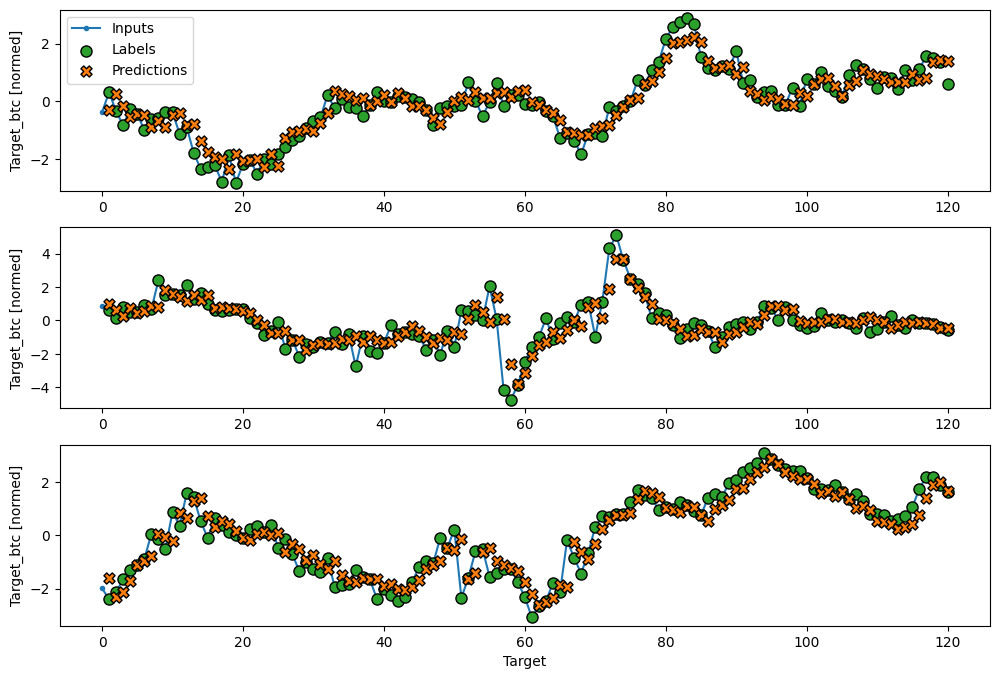

In [113]:
wide_window.plot(lstm_model)

In [114]:
def plot2(self, model=None, plot_col='Target_eth', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Target')

WindowGenerator.plot2 = plot2

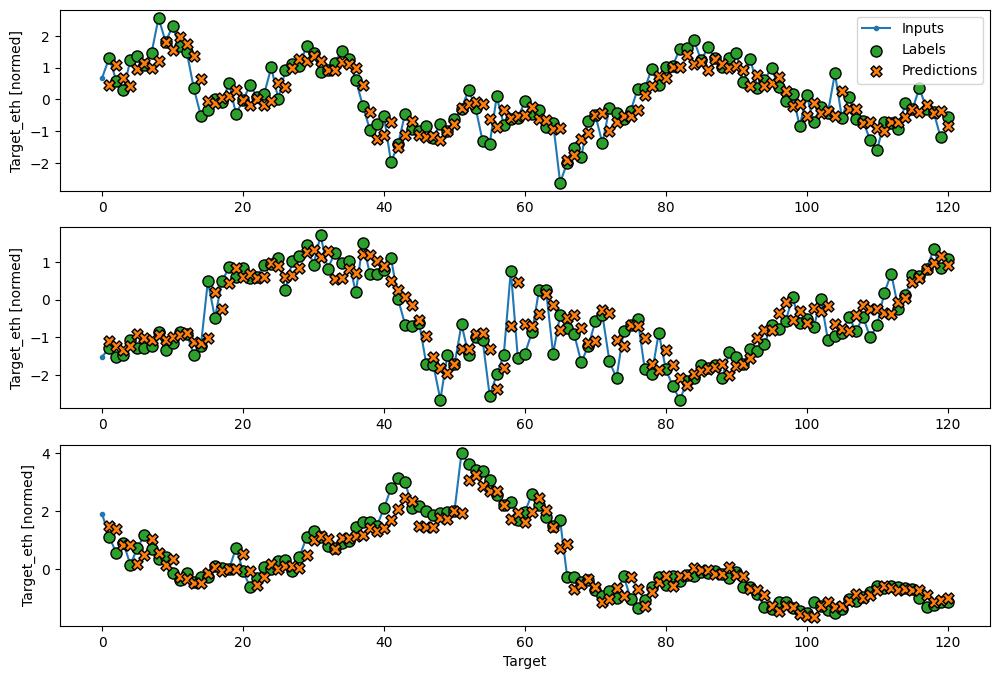

In [115]:
wide_window.plot2(lstm_model)

In [116]:
def plot3(self, model=None, plot_col='Target-eos', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Target')

WindowGenerator.plot3 = plot3

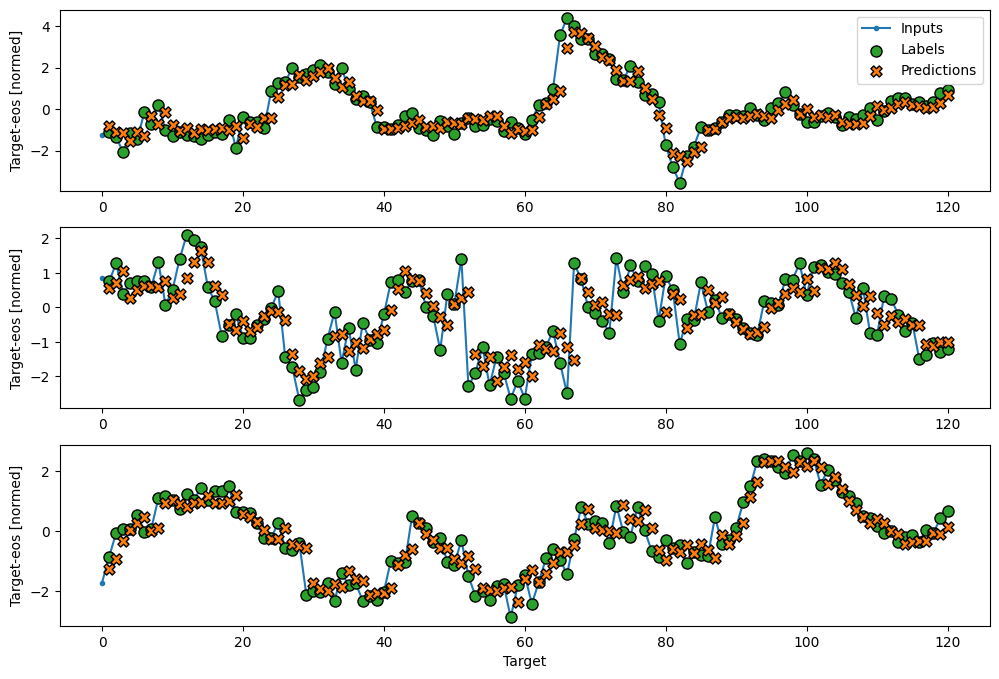

In [117]:
wide_window.plot3(lstm_model)

In [119]:
# Evaluate the model on the validation set
val_results = lstm_model.evaluate(wide_window.val)

# Assuming the first output corresponds to 'Close', the second to 'High', and the third to 'Low'
output_names = ['Target_btc']

# Print the accuracy for each output
for i, name in enumerate(output_names):
    if i+1 < len(val_results):
        print(f'{name} Accuracy: {val_results[i+1]:.4f}')
    else:
        print(f'{name} Accuracy: Not Available')


164/164 [==============================] - 15s 90ms/step - loss: 0.2139 - mean_absolute_error: 0.3384
Target_btc Accuracy: 0.3384
